In [1]:
%matplotlib inline

import math
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
status = pd.read_csv("Set de datos TP1/status.csv",iterator=True,chunksize=100000)
station = pd.read_csv("Set de datos TP1/station.csv")
weather = pd.read_csv("Set de datos TP1/weather.csv")
trip = pd.read_csv("Set de datos TP1/trip.csv")

In [3]:
#Status es muy grande como para procesarlo todo junto, tomamos solamente una parte para ver qué tipo de datos tiene
status_partial = status.get_chunk()

In [4]:
#Para cada estación tenemos, minuto a minuto, la información de cuántas bicicletas disponibles hay.
status_partial

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02


In [5]:
#Verificamos los tipos de datos
status_partial.dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

In [6]:
#Vemos qué forma tiene station. Podemos ver que cada registro nos muestra información sobre cada una de las 
#estaciones del circuito.
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [7]:
#Verificación de los tipos
station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [8]:
#Weather nos da información de las condiciones meteorológicas día a día. La columna zip code representa a qué
#costa de san francisco pertenece la información. Es por eso que los se repite el mismo día varias veces, cada
#uno de esos días repetidos pertenece a una costa diferente
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
5,9/3/2013,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,10.0,10.0,24.0,15.0,31.0,0,2.0,NaN,276.0,94107
6,9/4/2013,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,10.0,10.0,29.0,19.0,35.0,0,4.0,NaN,269.0,94107
7,9/5/2013,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,10.0,10.0,31.0,21.0,37.0,0,3.0,NaN,270.0,94107
8,9/6/2013,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,10.0,10.0,24.0,8.0,28.0,0,0.0,NaN,287.0,94107
9,9/7/2013,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,10.0,10.0,21.0,8.0,25.0,0,1.0,NaN,305.0,94107


In [9]:
#Verificamos los tipos, vemos que el campo precipitation_inches es un object. Sería más apropiado que fuera
#float 64. 
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [10]:
#Ahora sí, está corregido
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [11]:
#En trip tenemos información sobre cada uno de los viajes que se realizaron durante el período analizado
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


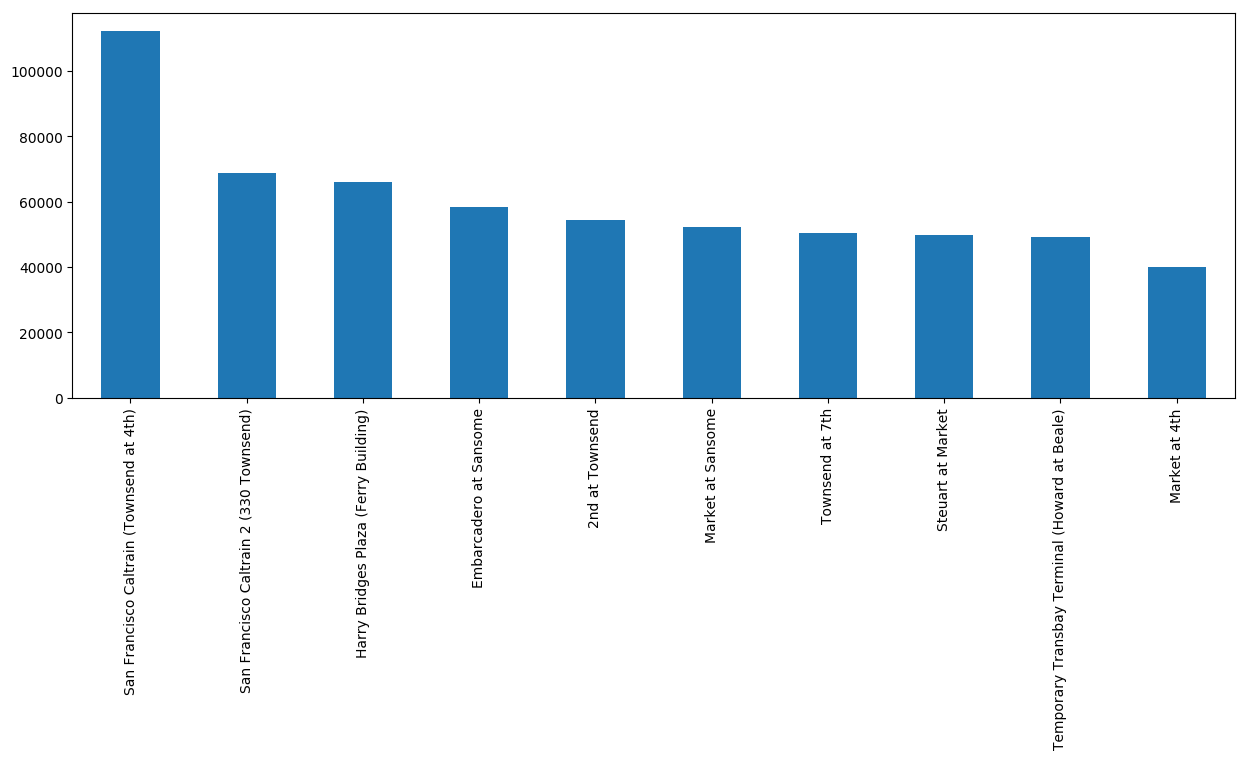

In [12]:
#Comenzamos haciendo un analisis de las estaciones, veamos cuáles son las diez más transitadas

most_popular_start_stations = trip.start_station_name.value_counts().sort_values(ascending = False)
most_popular_end_stations = trip.end_station_name.value_counts().sort_values(ascending = False)
most_popular_stations = (most_popular_start_stations + most_popular_end_stations).sort_values(ascending = False)
most_popular_stations[:10].plot('bar')


In [99]:
#Cómo es el movimiento de la estación más popular durante el día? Cuáles son sus horas pico?

#A  = pd.core.frame.DataFrame(columns = ['station_id','bikes_available','docks_available','time'])
#while True:
#    status_partial = status_partial[status_partial.station_id == 5]
#    A = pd.concat([A,status_partial])
#    try:
#        status_partial = status.get_chunk()
#    except StopIteration:
#        break
    

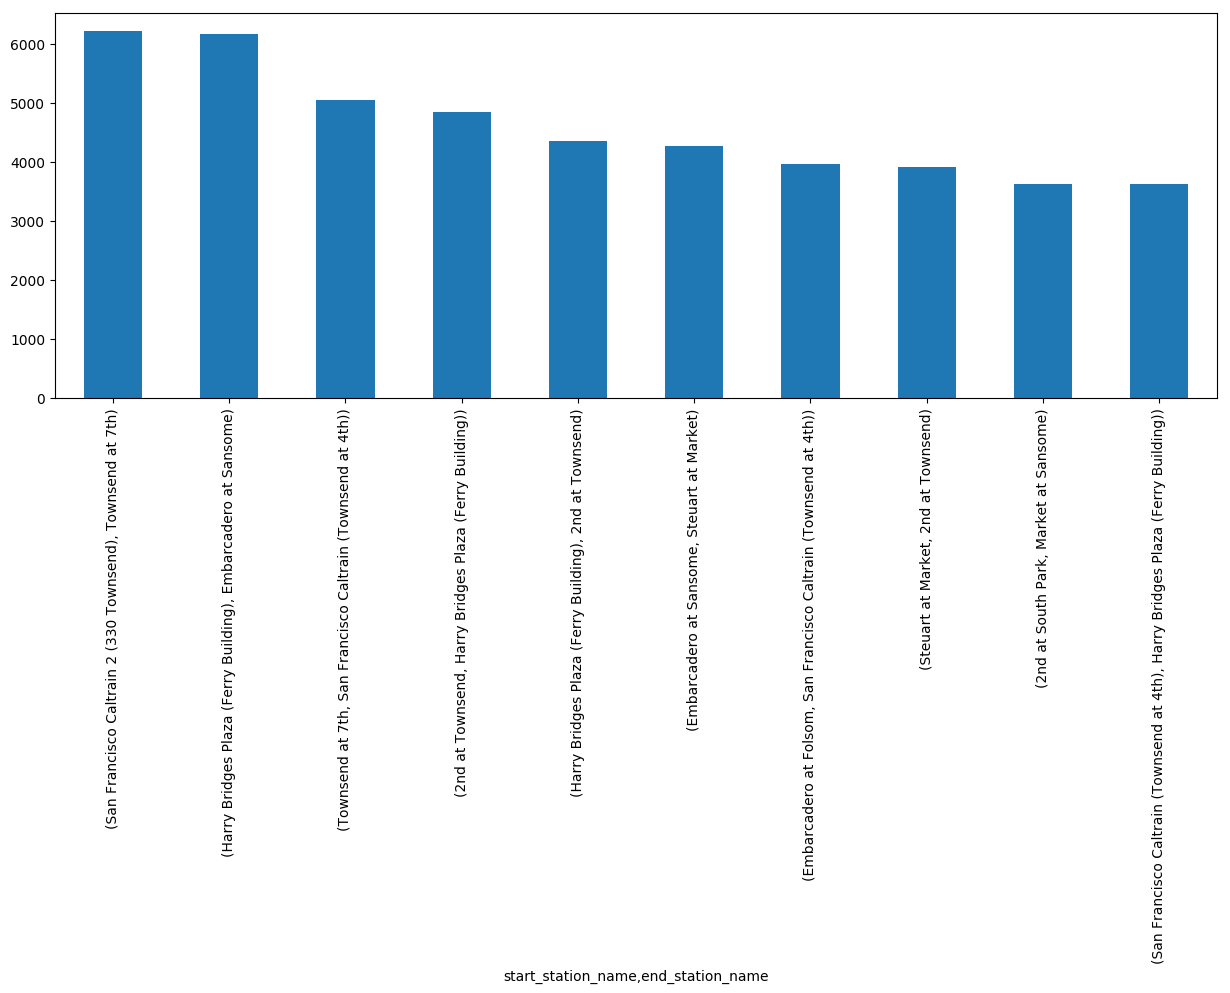

In [188]:
#Las diez rutas más populares para los cicclistas
most_popular_routes = trip.groupby('start_station_name').end_station_name.value_counts().sort_values(ascending=False)
most_popular_routes[:10].plot('bar')

In [199]:
#Estudiemos, en promedio, cuánto demora el viaje en la ruta más usual

from_SFCaltrain_2 = trip[trip.start_station_name == 'San Francisco Caltrain 2 (330 Townsend)']
from_SFCaltrain_2_to_Townsend_at_7th = from_SFCaltrain_2[from_SFCaltrain_2.end_station_name == 'Townsend at 7th']
from_SFCaltrain_2_to_Townsend_at_7th.duration.sum() / 6216 #Siendo 6216 la cantidad de registros del dataframe

317